# Data Understanding (Outlier)

## Deteksi Outlier

Outlier adalah data yang berbeda jauh dari pola umum dalam dataset. Penyebabnya bisa karena kesalahan pengukuran, input data yang salah, atau fenomena unik. Outlier bisa memengaruhi hasil analisis dan model machine learning, sehingga perlu dideteksi.

## K-Nearest Neighbors (KNN)

KNN bekerja dengan melihat kedekatan antar data. Dalam deteksi outlier, KNN mengukur jarak antara suatu titik dengan tetangga terdekatnya:

- Jika suatu titik hanya memiliki sedikit tetangga dalam radius tertentu, kemungkinan besar itu outlier.

- Jika jarak ke tetangga terdekat sangat besar, titik tersebut bisa dianggap sebagai outlier.

### Tahap Deteksi Outlier dengan KNN

1. Menghitung Jarak Antar Titik

- Menggunakan metrik jarak seperti Euclidean, Manhattan, atau Minkowski untuk mengukur kedekatan antar data.

2. Menentukan Nilai K (Jumlah Tetangga Terdekat)

- K terlalu kecil: terlalu sensitif terhadap noise.

- K terlalu besar: kurang akurat dalam mendeteksi outlier.

3. Menentukan Skor Outlier

- K-Nearest Neighbor Distance: Jika jarak ke K tetangga terlalu besar, kemungkinan outlier.

- Local Outlier Factor (LOF): Membandingkan kepadatan suatu titik dengan tetangganya. Jika kepadatannya lebih rendah, kemungkinan outlier.

- Distance-Based Outlier Score: Jika jumlah tetangga dalam radius tertentu sangat sedikit, bisa dianggap outlier.

### Kesimpulan

KNN bisa digunakan untuk mendeteksi outlier dengan menganalisis jarak antara titik data dan tetangganya. Metode seperti K-Nearest Neighbor Distance dan LOF membantu mengidentifikasi data yang berbeda jauh dari pola umum. Pemilihan K dan metrik jarak yang tepat sangat penting untuk akurasi deteksi outlier.

 id           Class  petal length  petal width  sepal length  sepal width  distance  outlier
  1     Iris-setosa           1.4          0.2           5.1          3.5  4.140048    False
  2     Iris-setosa           1.4          0.2           4.9          3.0  4.153312    False
  3     Iris-setosa           1.3          0.2           4.7          3.2  4.298837     True
  4     Iris-setosa           1.5          0.2           4.6          3.1  4.149699    False
  5     Iris-setosa           1.4          0.2           5.0          3.6  4.173727    False
  6     Iris-setosa           1.7          0.4           5.4          3.9  3.818377    False
  7     Iris-setosa           1.4          0.3           4.6          3.4  4.217819    False
  8     Iris-setosa           1.5          0.2           5.0          3.4  4.060788    False
  9     Iris-setosa           1.4          0.2           4.4          2.9  4.302325     True
 10     Iris-setosa           1.5          0.1           4.9          

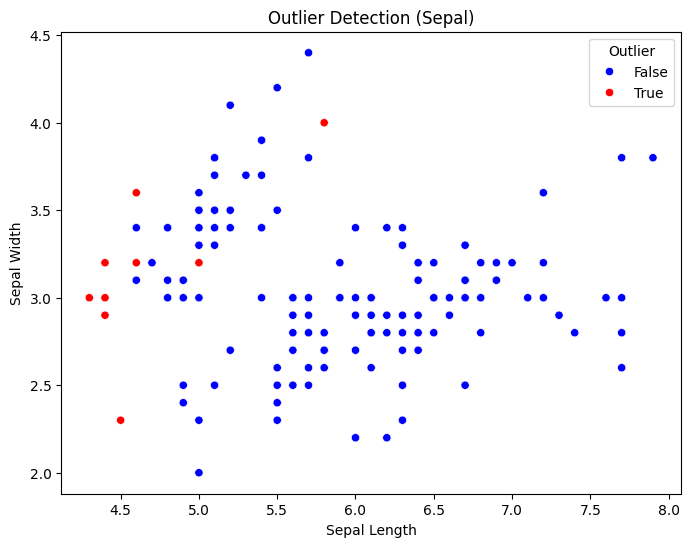

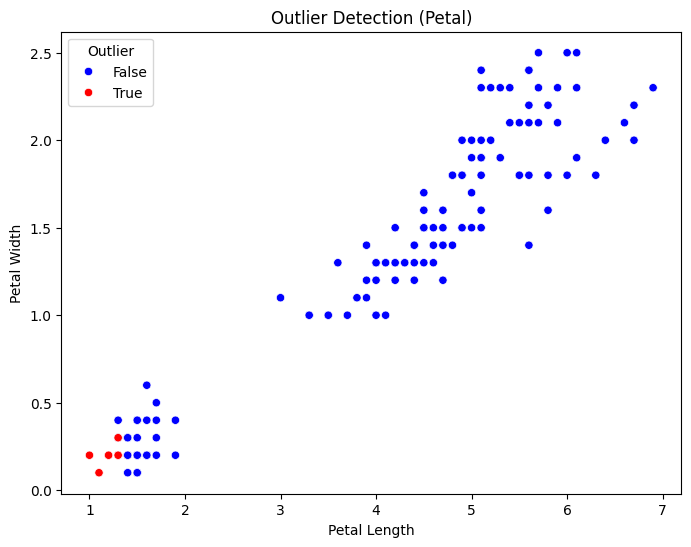

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import euclidean

# Load kedua file CSV
df_mysql = pd.read_csv("mysql.csv")
df_postgres = pd.read_csv("postgres.csv")

# Gabungkan berdasarkan 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgres, on=['id', 'Class'], how='inner')

# Pilih fitur yang digunakan untuk perhitungan jarak
feature_columns = ["petal length", "petal width", "sepal length", "sepal width"]
data_values = df_merged[feature_columns].values

# Ambil referensi dari baris terakhir
reference_point = data_values[-1]

# Fungsi untuk menghitung jarak Euclidean ke referensi
def compute_distances(data, reference):
    return np.array([euclidean(row, reference) for row in data])

# Hitung jarak Euclidean dari setiap baris ke referensi
df_merged["distance"] = compute_distances(data_values, reference_point)

# Tentukan threshold outlier berdasarkan persentil ke-93.5
threshold = np.percentile(df_merged["distance"], 93.5)
df_merged["outlier"] = df_merged["distance"] > threshold

# Cetak hasil data dengan outlier
print(df_merged.to_string(index=False))

# Visualisasi scatter plot untuk Sepal
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["sepal length"], y=df_merged["sepal width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Sepal)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title="Outlier")
plt.show()

# Visualisasi scatter plot untuk Petal
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["petal length"], y=df_merged["petal width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Petal)")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(title="Outlier")
plt.show()

Kode ini bertujuan untuk mendeteksi outlier dalam dataset yang berasal dari MySQL dan PostgreSQL menggunakan jarak Euclidean. Pertama, data dari kedua sumber dibaca dan digabungkan berdasarkan kolom "id" dan "Class". Selanjutnya, fitur "petal length", "petal width", "sepal length", dan "sepal width" dipilih untuk analisis. Jarak Euclidean dihitung dengan membandingkan setiap baris terhadap baris terakhir sebagai referensi, lalu hasilnya disimpan dalam kolom "distance". Untuk menentukan outlier, digunakan threshold berdasarkan persentil ke-93.5, di mana data dengan jarak lebih besar dari threshold dianggap sebagai outlier. Hasil analisis ditampilkan dalam bentuk tabel dan divisualisasikan menggunakan scatter plot untuk sepal dan petal, dengan titik merah menunjukkan outlier dan titik biru sebagai data normal. Melalui pendekatan ini, kode dapat mengidentifikasi data yang berbeda secara signifikan dari pola umum dalam dataset.

In [2]:
# Hitung total outlier
total_outliers = df_merged["outlier"].sum()
print(f"Total Outlier: {total_outliers}")

Total Outlier: 10


Kode ini berfungsi untuk menghitung jumlah total outlier dalam dataset setelah proses deteksi menggunakan jarak Euclidean. Dengan menjumlahkan nilai True pada kolom "outlier", kode ini menentukan berapa banyak data yang dianggap menyimpang berdasarkan threshold yang telah ditentukan sebelumnya. Hasil perhitungan kemudian disimpan dalam variabel total_outliers dan ditampilkan dalam format yang lebih informatif menggunakan fungsi print(). Dengan adanya langkah ini, pengguna dapat dengan mudah mengetahui jumlah data yang diklasifikasikan sebagai outlier tanpa harus menganalisis tabel secara manual.

In [3]:
# Urutkan data berdasarkan jarak dari terkecil ke terbesar
df_sorted = df_merged.sort_values(by="distance", ascending=True)

# Tampilkan hasilnya
print(df_sorted.to_string(index=False))

 id           Class  petal length  petal width  sepal length  sepal width  distance  outlier
150  Iris-virginica           5.1          1.8           5.9          3.0  0.000000    False
128  Iris-virginica           4.9          1.8           6.1          3.0  0.282843    False
139  Iris-virginica           4.8          1.8           6.0          3.0  0.316228    False
102  Iris-virginica           5.1          1.9           5.8          2.7  0.331662    False
143  Iris-virginica           5.1          1.9           5.8          2.7  0.331662    False
 71 Iris-versicolor           4.8          1.8           5.9          3.2  0.360555    False
 84 Iris-versicolor           5.1          1.6           6.0          2.7  0.374166    False
122  Iris-virginica           4.9          2.0           5.6          2.8  0.458258    False
127  Iris-virginica           4.8          1.8           6.2          2.8  0.469042    False
124  Iris-virginica           4.9          1.8           6.3          

Kode ini mengurutkan dataset berdasarkan nilai jarak Euclidean dari yang terkecil hingga yang terbesar. Dengan menggunakan fungsi sort_values(), pengurutan dilakukan pada kolom "distance" dalam urutan ascending (menaik), sehingga data yang paling mirip dengan referensi akan berada di atas, sedangkan data yang paling berbeda (termasuk outlier) berada di bawah. Hasil pengurutan kemudian disimpan dalam variabel df_sorted, dan ditampilkan dalam bentuk tabel menggunakan print(df_sorted.to_string(index=False)), yang memastikan tampilan data tanpa indeks tambahan. Langkah ini membantu pengguna untuk menganalisis pola jarak dan dengan mudah mengidentifikasi outlier dalam dataset.

## Local Outlier Factor (LOF)

Local Outlier Factor (LOF) adalah metode berbasis kepadatan yang digunakan untuk mengidentifikasi outlier dalam suatu dataset. LOF membandingkan kepadatan lokal suatu titik dengan kepadatan lokal dari tetangganya. Jika suatu titik memiliki kepadatan yang jauh lebih rendah dibandingkan dengan sekitarnya, maka titik tersebut dianggap sebagai outlier.

LOF mengukur sejauh mana suatu titik berbeda dari tetangganya dalam hal kepadatan. Metode ini berguna dalam mendeteksi outlier karena tidak hanya mempertimbangkan jarak absolut, tetapi juga pola kepadatan lokal. LOF memberikan skor, di mana nilai lebih tinggi menunjukkan bahwa titik tersebut lebih mungkin menjadi outlier.

### Tahapan LOF

1. Menentukan jumlah tetangga (k-nearest neighbors, k): LOF membutuhkan parameter k yang menentukan jumlah tetangga yang akan dianalisis untuk setiap titik.

2. Menghitung jarak k-tetangga terdekat: Untuk setiap titik, dihitung jarak ke k tetangga terdekatnya.

3. Menentukan kepadatan lokal: Kepadatan lokal dihitung berdasarkan jarak rata-rata ke tetangga terdekat.

4. Menghitung LOF score: Perbandingan kepadatan lokal titik dengan kepadatan lokal dari tetangga-tetangganya digunakan untuk menentukan apakah suatu titik adalah outlier.

5. Menentukan threshold outlier: Biasanya, nilai LOF yang lebih tinggi dari ambang batas tertentu dianggap sebagai outlier.

### Mengitung Manual

Sebagai contoh, kita akan menghitung LOF secara manual menggunakan dataset kecil yang terdiri dari 10 baris dengan 2 fitur:

| ID | Feature 1 | Feature 2 |
| -- | --------- | --------- |
| 1  | 2.0       | 3.0       |
| 2  | 2.5       | 3.2       |
| 3  | 2.2       | 3.1       |
| 4  | 8.0       | 9.0       |
| 5  | 2.1       | 3.0       |
| 6  | 2.3       | 3.2       |
| 7  | 8.1       | 9.2       |
| 8  | 2.4       | 3.3       |
| 9  | 2.6       | 3.4       |
| 10 | 7.9       | 9.1       |

Misalkan kita ingin menghitung LOF untuk titik **ID = 3 (2.2, 3.1)**.

1. **Hitung Jarak Euclidean ke Tetangga Terdekat**:
   - Ke titik 5 (2.1, 3.0): 0.14
   - Ke titik 6 (2.3, 3.2): 0.14
   - Ke titik 2 (2.5, 3.2): 0.31

2. **Tentukan k-Tetangga Terdekat (k=3)**:
   - Tetangga terdekat: titik 5, 6, dan 2.

3. **Hitung Reachability Distance**:
   - Reachability distance dihitung sebagai maksimum antara jarak Euclidean dan jarak k-neighbor.
   - rD(3,5) = max(0.14, 0.31) = 0.31
   - rD(3,6) = max(0.14, 0.31) = 0.31
   - rD(3,2) = max(0.31, 0.31) = 0.31

4. **Hitung Local Reachability Density (LRD)**:

   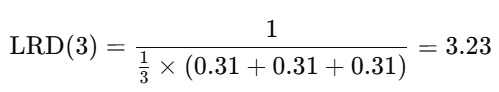

5. **Hitung LOF**:

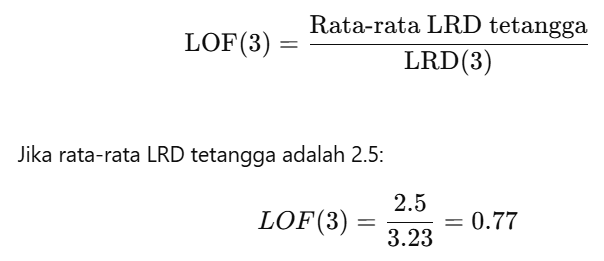

7. **Interpretasi**:
   - Karena **LOF < 1**, titik **ID = 3** bukan outlier.
   - Jika LOF jauh lebih besar dari 1, titik akan dianggap outlier.

### Implementasi LOF menggunakan Scikit-Learn

In [9]:
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd

# Dataset
data = {
    "Feature 1": [2.0, 2.5, 2.2, 8.0, 2.1, 2.3, 8.1, 2.4, 2.6, 7.9],
    "Feature 2": [3.0, 3.2, 3.1, 9.0, 3.0, 3.2, 9.2, 3.3, 3.4, 9.1]
}
df = pd.DataFrame(data)

# Model LOF
lof = LocalOutlierFactor(n_neighbors=3)
df["LOF Label"] = lof.fit_predict(df)

# Menampilkan jumlah outlier
num_outliers = (df["LOF Label"] == -1).sum()
print(f"\nJumlah outlier: {num_outliers}")

# Menampilkan data outlier
outliers = df[df['LOF Label'] == -1]
print("\nData Outlier:")
print(outliers)


Jumlah outlier: 3

Data Outlier:
   Feature 1  Feature 2  LOF Label
3        8.0        9.0         -1
6        8.1        9.2         -1
9        7.9        9.1         -1


Kode di atas menggunakan metode **Local Outlier Factor (LOF)** dari pustaka `scikit-learn` untuk mendeteksi **outlier** dalam dataset. Dataset terdiri dari dua fitur dengan 10 sampel yang disimpan dalam bentuk `DataFrame`. Model LOF dibuat dengan mempertimbangkan **3 tetangga terdekat** (`n_neighbors=3`) untuk menghitung kepadatan lokal setiap titik. Hasil perhitungan LOF mengembalikan label `1` untuk data normal dan `-1` untuk data yang dianggap **outlier**. Setelah itu, kode menghitung jumlah outlier dan menampilkan daftar sampel yang terdeteksi sebagai **outlier** berdasarkan skor LOF. Dengan pendekatan ini, kita dapat mengidentifikasi data yang berbeda secara signifikan dari sekitarnya, yang berguna dalam **analisis data** dan **pembersihan dataset**.